#  Fake News Detection Using Deep Learning and NLP

## 📖 Introduction

In today's digital landscape, the spread of misinformation—commonly referred to as **fake news**—has become a major societal issue. The goal of this project is to build an intelligent system that can automatically detect and classify news articles as **fake** or **true**, using a combination of **Natural Language Processing (NLP)** and **Deep Learning** techniques.

This project not only explores classical machine learning algorithms but also fine-tunes a modern transformer model (**DistilBERT**) to achieve high performance. The system is deployed via a **Streamlit** web application, allowing users to test news headlines or content in real time.

---

## 🎯 Objectives

- Preprocess raw news text using advanced NLP techniques.
- Train and evaluate both traditional and deep learning models.
- Fine-tune a transformer-based model for binary classification.
- Visualize important text patterns and model performance.
- Deploy the system for real-time use through an interactive web interface.

---

## 🧰 Tools, Technologies, and Libraries

| Category               | Tools & Libraries Used                                                  |
|------------------------|-------------------------------------------------------------------------|
| **Language**           | Python                                                                  |
| **Preprocessing**      | SpaCy, Regular Expressions, Custom Lemmatization                        |
| **Feature Extraction** | TF-IDF Vectorizer                                                       |
| **Machine Learning**   | Logistic Regression (Scikit-learn)                                      |
| **Deep Learning**      | DistilBERT (`TFDistilBertForSequenceClassification`) via Hugging Face   |
| **Visualization**      | Matplotlib, Seaborn, WordCloud                                          |
| **Deployment**         | Streamlit                                                               |

---

## 🔄 Pipelines Overview

This project consists of two distinct pipelines: one for traditional ML and one for transformer-based deep learning.

### 🔹 1. Traditional ML Pipeline (Logistic Regression)

```
Raw News Text
     ↓
Text Cleaning & Preprocessing
  - Lowercasing
  - Punctuation & Stopword Removal
  - Lemmatization (SpaCy)
     ↓
TF-IDF Vectorization
     ↓
Logistic Regression Model
     ↓
Prediction: Fake or True
```

### 🔹 2. Deep Learning Pipeline (DistilBERT)

```
Raw News Text
     ↓
Tokenization using DistilBertTokenizerFast
  - input_ids
  - attention_mask
     ↓
Fine-tuned DistilBERT Model
  (TFDistilBertForSequenceClassification)
     ↓
Softmax Output → Final Prediction
     ↓
Prediction: Fake or True
```


## 🧪 Workflow Overview

1. **Data Loading**: Importing and examining labeled news dataset (1 = True, 0 = Fake).
2. **Text Preprocessing**:
   - Lowercasing, punctuation removal, stopword removal
   - Lemmatization using SpaCy
3. **Feature Engineering**:
   - Classical ML: TF-IDF vectorization
   - Deep Learning: Tokenization with `DistilBertTokenizerFast`
4. **Model Training**:
   - **Logistic Regression** for a fast and interpretable baseline
   - **DistilBERT** fine-tuned on labeled news for high accuracy
5. **Evaluation**:
   - Accuracy, Precision, Recall, F1-Score
   - Confusion Matrix and Classification Reports
6. **Visualization**:
   - Word clouds for fake vs. true news patterns
   - Graphs for performance comparison
7. **Deployment**:
   - Developed an interactive **Streamlit app** for user input and real-time predictions

---

## 📈 Results

- **Logistic Regression Accuracy**: 99.3%
- **DistilBERT Accuracy**: 99.8%
- The fine-tuned DistilBERT model outperformed traditional models in both precision and recall, making it the primary model for deployment.

---

## 🔮 Future Enhancements

- Extend to **multi-class classification** (e.g., satire, bias, opinion).
- Integrate **real-time news scraping APIs** for live predictions.
- Implement **ensemble models** to further boost performance.
- Add **explainability modules** (e.g., LIME/SHAP) for transparency.
- Deploy on **cloud platforms** for global accessibility.

---

> 💡 This project combines the power of traditional ML and modern transformer-based models to tackle one of the most pressing issues in digital communication: detecting fake news with high confidence and clarity.

---

**Developed by:** *Saad*  
*Department of Information Technology, Bahauddin Zakariya University, Multan*


In [27]:
import spacy
nlp = spacy.load('en_core_web_sm')


In [28]:
# === 1. Import Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [29]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
folder_path = '/content/drive/My Drive/FYP/'


## Loading **True** & **Fake** CSV's

In [30]:
# === 2. Load Data ===
true_df = pd.read_csv('/content/drive/My Drive/FYP/True.csv')
fake_df = pd.read_csv('/content/drive/My Drive/FYP/Fake.csv')

true_df['label'] = 1
fake_df['label'] = 0

## Pre-process True Dataset

In [31]:
true_df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [32]:
true_df.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [33]:
true_df.shape

(21417, 5)

In [34]:
true_df.duplicated().sum()

np.int64(206)

In [35]:
true_df.drop_duplicates(inplace=True)
true_df.duplicated().sum()

np.int64(0)

In [36]:
true_df.shape

(21211, 5)

## Final validation code for **true_df**

In [37]:
# 1. Check for missing values
print("Missing values per column:\n", true_df.isnull().sum())

Missing values per column:
 title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [38]:
# 2. Check for fully duplicated rows (should be 0)
print("\nFully duplicated rows:", true_df.duplicated().sum())


Fully duplicated rows: 0


In [39]:
# 3. Check for duplicated news text only
if 'text' in true_df.columns:
    print("Duplicated 'text' entries:", true_df.duplicated(subset='text').sum())
else:
    print("'text' column not found! Please confirm the column name.")

Duplicated 'text' entries: 19


In [40]:
# 4. Check unique labels (should be only 1)
print("\nUnique labels in 'label' column:", true_df['label'].unique())


Unique labels in 'label' column: [1]


In [41]:
# 5. Check for any label not equal to 1
print("Any rows with label not 1?:", (true_df['label'] != 1).sum())

Any rows with label not 1?: 0


In [42]:
# 6. Reset index for cleanliness
true_df = true_df.reset_index(drop=True)
print("\nFinal shape of clean `true_df`:", true_df.shape)


Final shape of clean `true_df`: (21211, 5)


In [43]:
# See duplicated text entries (first few)
dup_texts = true_df[true_df.duplicated(subset='text', keep=False)]
print(dup_texts)

                                                   title  \
165           What is in the Republicans' final tax bill   
166    Factbox: What is in the U.S. Republicans' fina...   
247    Aide tries to refocus tax debate after Trump's...   
250    Aide tries to refocus U.S. tax debate after Tr...   
566    Trump and Putin speak for an hour about Syria,...   
732    China's Xi says will persist with Korean penin...   
770    Trump to ask China to cut financial links with...   
778    South Korea's Moon first suggested Trump visit...   
808    Trump, Abe didn't discuss bilateral FTA: Japan...   
1007   Russia to respond to Twitter ban on Russian me...   
1139   Putin says Trump hampered from delivering elec...   
1474   Trump to host Thai prime minister on October 2...   
1585   China says to ban some petroleum exports to No...   
1772   Russia: Moscow does not want to escalate situa...   
1926   Trump to nominate Juster to be ambassador to I...   
4738   Key conservative lawmaker says ma

In [44]:
# Print the number of duplicated entries
print(f"Total duplicated rows based on 'text': {len(dup_texts)}")

Total duplicated rows based on 'text': 38


In [45]:
# Remove all rows where 'text' is duplicated (including the first occurrence)
true_df_cleaned = true_df[~true_df.duplicated(subset='text', keep=False)].copy()

# Optional: Reset index
true_df_cleaned.reset_index(drop=True, inplace=True)

# Check result
print(f"Original rows: {len(true_df)}")
print(f"Rows after removing duplicates: {len(true_df_cleaned)}")


Original rows: 21211
Rows after removing duplicates: 21173


In [46]:
dup_texts_with_title = true_df[true_df.duplicated(subset=['title', 'text'])]
print(dup_texts_with_title)

                                                   title  \
8460        Factbox: Why the Zika virus is causing alarm   
11176  Exclusive: Atlantic City emergency fiscal mana...   
11194  For Republican Rubio, a moment of truth in rac...   
14072  Trump and Putin speak for an hour about Syria,...   
15129  China's Xi says will persist with Korean penin...   
15236  Trump to ask China to cut financial links with...   
15244  South Korea's Moon first suggested Trump visit...   
15428  Trump, Abe didn't discuss bilateral FTA: Japan...   
16209  Russia to respond to Twitter ban on Russian me...   
16810  Putin says Trump hampered from delivering elec...   
18564  Trump to host Thai prime minister on October 2...   
19080  China says to ban some petroleum exports to No...   
20054  Russia: Moscow does not want to escalate situa...   
20951  Trump to nominate Juster to be ambassador to I...   

                                                    text       subject  \
8460   Global health offi

In [47]:
# Print the number of duplicated entries
print(f"Total duplicated rows based on 'text': {len(dup_texts_with_title)}")

Total duplicated rows based on 'text': 14


In [48]:
true_df_cleaned

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21168,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21169,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21170,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21171,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


## Pre-process Fake Dataset

In [49]:
fake_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [50]:
fake_df.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [51]:
fake_df.shape

(23481, 5)

In [52]:
fake_df = fake_df[fake_df['text'].notnull() & (fake_df['text'].str.strip() != '')]

In [53]:
print("Original shape:", fake_df.shape)
cleaned_fake_df = fake_df[fake_df['text'].notnull() & (fake_df['text'].str.strip() != '')]
print("After cleaning:", cleaned_fake_df.shape)


Original shape: (22851, 5)
After cleaning: (22851, 5)


In [54]:
# Find rows where text length after strip is 0
mask = fake_df['text'].str.strip().str.len() == 0
print("Rows with empty/whitespace text:", mask.sum())


Rows with empty/whitespace text: 0


In [55]:
fake_df = fake_df[fake_df['text'].notnull() & (fake_df['text'].str.strip().str.len() > 0)]


In [56]:
print("Original shape:", fake_df.shape)
cleaned_fake_df = fake_df[fake_df['text'].notnull() & (fake_df['text'].str.strip().str.len() > 0)]
print("After cleaning:", cleaned_fake_df.shape)

Original shape: (22851, 5)
After cleaning: (22851, 5)


In [57]:
cleaned_fake_df.duplicated().sum()

np.int64(3)

In [58]:
cleaned_fake_df.drop_duplicates(inplace=True)
cleaned_fake_df.duplicated().sum()

np.int64(0)

In [59]:
cleaned_fake_df.shape

(22848, 5)

In [60]:
print(cleaned_fake_df['text'].isnull().sum())  # should be 0


0


In [61]:
print((cleaned_fake_df['text'].str.strip().str.len() == 0).sum())  # should be 0


0


In [62]:
cleaned_fake_df['text'].sample(5)  # random 5 samples to confirm non-empty text


,text
8570,"Bill Maher is all about telling it like it is,..."
6204,President Barack Obama made history when he ap...
9590,Exactly one year ago today on arrogant Hillary...
6682,Donald Trump cruised to huge victories in all ...
15577,You can t make this up! Why are these criminal...


In [63]:
# Final fake_df cleaning
cleaned_fake_df = fake_df[fake_df['text'].notnull() & (fake_df['text'].str.strip().str.len() > 0)].copy()
cleaned_fake_df = cleaned_fake_df[~cleaned_fake_df.duplicated(subset='text', keep=False)].copy()
cleaned_fake_df.reset_index(drop=True, inplace=True)

print(f"Final cleaned fake_df shape: {cleaned_fake_df.shape}")

Final cleaned fake_df shape: (12527, 5)


In [64]:
cleaned_fake_df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
12522,The White House and The Theatrics of ‘Gun Cont...,21st Century Wire says All the world s a stage...,US_News,"January 7, 2016",0
12523,Activists or Terrorists? How Media Controls an...,Randy Johnson 21st Century WireThe majority ...,US_News,"January 7, 2016",0
12524,"BOILER ROOM – No Surrender, No Retreat, Heads ...",Tune in to the Alternate Current Radio Network...,US_News,"January 6, 2016",0
12525,Federal Showdown Looms in Oregon After BLM Abu...,21st Century Wire says A new front has just op...,US_News,"January 4, 2016",0


In [65]:
# Save cleaned CSV
cleaned_fake_df.to_csv('/content/drive/My Drive/FYP/Fake_cleaned.csv', index=False)

# DataFrame
Merge **true_df**, **cleaned_fake_df** into the DataFrame

In [66]:
df = pd.concat([true_df_cleaned, cleaned_fake_df]).reset_index(drop=True)

In [67]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [68]:
df.shape

(33700, 5)

In [69]:
df.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [70]:
df.duplicated().sum()

np.int64(0)

In [71]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

## Double Check for Duplicate Samples

In [72]:
# Check for exact duplicate rows (text + label)
duplicate_rows = df.duplicated(subset=['text', 'label']).sum()
print(f"Number of duplicate text+label rows: {duplicate_rows}")

# Check for duplicate texts only (regardless of label)
duplicate_texts = df.duplicated(subset='text').sum()
print(f"Number of duplicate texts (ignoring label): {duplicate_texts}")


Number of duplicate text+label rows: 0
Number of duplicate texts (ignoring label): 0


In [73]:
df = df.drop_duplicates(subset='text').reset_index(drop=True)
df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
33695,The White House and The Theatrics of ‘Gun Cont...,21st Century Wire says All the world s a stage...,US_News,"January 7, 2016",0
33696,Activists or Terrorists? How Media Controls an...,Randy Johnson 21st Century WireThe majority ...,US_News,"January 7, 2016",0
33697,"BOILER ROOM – No Surrender, No Retreat, Heads ...",Tune in to the Alternate Current Radio Network...,US_News,"January 6, 2016",0
33698,Federal Showdown Looms in Oregon After BLM Abu...,21st Century Wire says A new front has just op...,US_News,"January 4, 2016",0


## Visualize the Subject of News

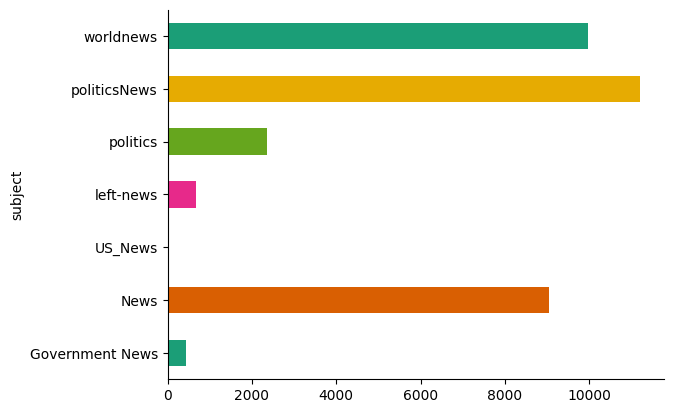

In [74]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('subject').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Visualize the Label

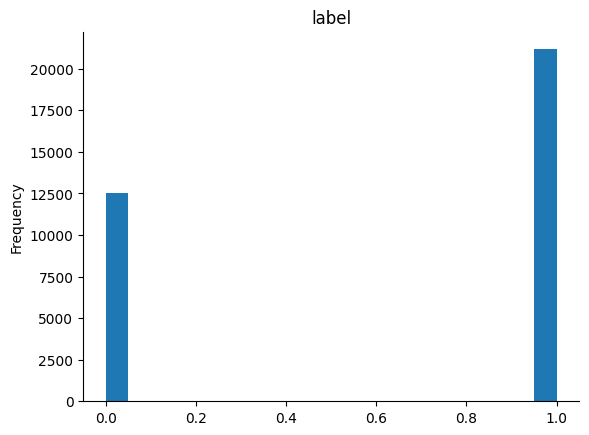

In [75]:
from matplotlib import pyplot as plt
df['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Visualize the data distribution

In [76]:
print(df['label'].unique())


[1 0]


In [77]:
df['label'] = df['label'].map({0: 'FAKE', 1: 'TRUE'})


/tmp/ipython-input-78-1166167357.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='label', palette='Set2')


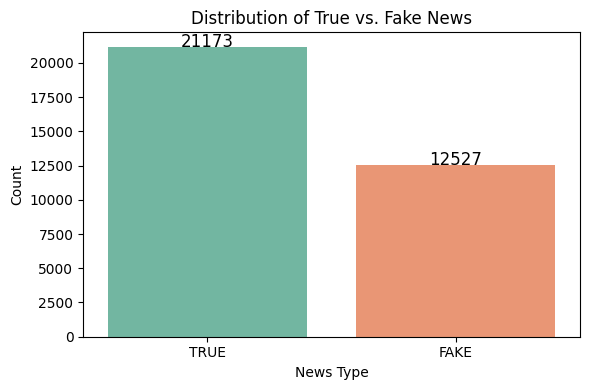

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='label', palette='Set2')

# Add count labels on top of each bar
for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2., count + 5,   # position
            str(count), ha="center", fontsize=12)

plt.title('Distribution of True vs. Fake News')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


## Data Cleaning Pipeline
In the journey to detect fake news, **clarity begins with clean data.** This preprocessing pipeline was crafted to strip away the noise — URLs, digits, punctuation, and stopwords — while preserving the **semantic core** of the text. By leveraging **SpaCy's linguistic intelligence**, it isolates meaningful words like **nouns, verbs, adjectives, and proper nouns**, and transforms them into their base forms. This process isn't just cleaning — it's **refining raw language into structured insight**, laying a strong foundation for accurate, context-aware model predictions. Each cleaned token now holds the **essence of meaning**, empowering the model to learn not just from words, but from **relevant and purposeful expression.**

In [79]:
import time
import re
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

start_time = time.time()

# Load SpaCy English model (disable unnecessary components for speed)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
stop_words = STOP_WORDS

# POS tags to keep for relevant words (nouns, proper nouns, verbs)
RELEVANT_POS = {'NOUN', 'PROPN', 'VERB', 'ADJ'}

# 1️⃣ Basic text cleaning before SpaCy
def basic_clean(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply basic cleaning first
df['pre_cleaned_text'] = df['text'].apply(basic_clean)

# 2️⃣ SpaCy processing function (lemmatize + POS filter + stopword removal)
def clean_text_spacy(doc):
    tokens = [
        token.lemma_.lower()
        for token in doc
        if token.is_alpha
        and token.pos_ in RELEVANT_POS
        and token.text.lower() not in stop_words
    ]
    return ' '.join(tokens)

# 3️⃣ Batch process with SpaCy pipe (faster than apply)
docs = nlp.pipe(df['pre_cleaned_text'], batch_size=500, n_process=1)

# 4️⃣ Apply cleaning function to processed docs
df['clean_text'] = [clean_text_spacy(doc) for doc in docs]

# Drop intermediate column
df.drop(columns=['pre_cleaned_text'], inplace=True)

end_time = time.time()
time_taken = end_time - start_time
minutes = int(time_taken // 60)
seconds = int(time_taken % 60)
print(f"The time it took for cleaning the text (batch + POS): {minutes} minutes and {seconds} seconds")


The time it took for cleaning the text (batch + POS): 14 minutes and 59 seconds


In [80]:
df['clean_text']

,clean_text
0,washington reuters head conservative republica...
1,washington reuters transgender people allow ti...
2,washington reuters special counsel investigati...
3,washington reuters trump campaign adviser geor...
4,reuters president donald trump call postal ser...
...,...
33695,st century wire say world s stage man woman pl...
33696,randy johnson st century wirethe majority main...
33697,tune alternate current radio network acr live ...
33698,st century wire say new open long battle ameri...


In [81]:
df['clean_text'][0]

'washington reuters head conservative republican faction congress vote month huge expansion national debt pay tax cut call fiscal conservative sunday urge budget restraint keep sharp pivot way republicans representative mark meadows speak cbs face nation draw hard line federal spending lawmaker brace battle january return holiday wednesday lawmaker begin try pass federal budget fight likely link issue immigration policy november congressional election campaign approach republicans seek control congress president donald trump republicans want big budget increase military spending democrats want proportional increase nondefense discretionary spending program support education scientific research infrastructure public health environmental protection trump administration willing go increase nondefense discretionary spending percent meadow chairman small influential house freedom caucus say program democrats say need government pay raise percent fiscal conservative rationale run people mone

In [82]:
print(df.shape)
print(df.columns)


(33700, 6)
Index(['title', 'text', 'subject', 'date', 'label', 'clean_text'], dtype='object')


## Comparing **Raw** vs. **Cleaned Text**
This transformation sharpens the data, empowering models to detect truth with clarity.
---



In [83]:
df[['text', 'clean_text']].head()


,text,clean_text
0,WASHINGTON (Reuters) - The head of a conservat...,washington reuters head conservative republica...
1,WASHINGTON (Reuters) - Transgender people will...,washington reuters transgender people allow ti...
2,WASHINGTON (Reuters) - The special counsel inv...,washington reuters special counsel investigati...
3,WASHINGTON (Reuters) - Trump campaign adviser ...,washington reuters trump campaign adviser geor...
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,reuters president donald trump call postal ser...


In [84]:
# Show original and cleaned text for the first row (index 0)
original_text = df.loc[0, 'text']
cleaned_text = df.loc[0, 'clean_text']

# Print both for clear comparison
print("=== ORIGINAL TEXT ===")
print(original_text)
print("\n=== CLEANED TEXT ===")
print(cleaned_text)


=== ORIGINAL TEXT ===
WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on program

In [ ]:
folder_path = '/content/drive/My Drive/FYP/'

df.to_csv(folder_path + 'cleaned_text_with_token_reduction.csv', index=False)

print("The cleaned DataFrame has been saved to 'cleaned_text_with_token_reduction.csv'")


The cleaned DataFrame has been saved to 'cleaned_text_with_token_reduction.csv'


## Token Reduction

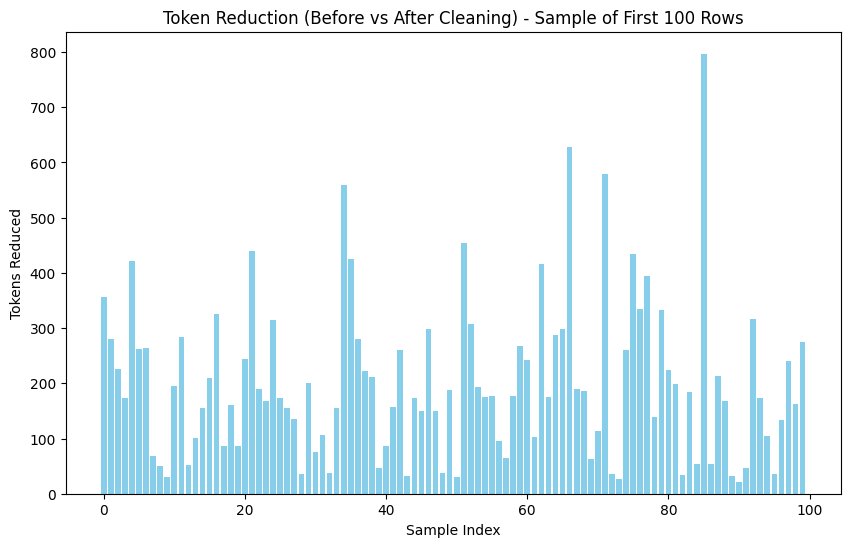

Total Tokens Reduced: 6579921
Average Tokens Reduced per Row: 195.25


In [85]:
import matplotlib.pyplot as plt

# Tokenize text before cleaning
df['tokens_before_cleaning'] = df['text'].apply(lambda x: len(x.split()))

# Tokenize text after cleaning (after lemmatization, stopword removal, etc.)
df['tokens_after_cleaning'] = df['clean_text'].apply(lambda x: len(x.split()))

# Calculate the reduction in tokens
df['token_reduction'] = df['tokens_before_cleaning'] - df['tokens_after_cleaning']

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.bar(df.index[:100], df['token_reduction'][:100], color='skyblue')
plt.title('Token Reduction (Before vs After Cleaning) - Sample of First 100 Rows')
plt.xlabel('Sample Index')
plt.ylabel('Tokens Reduced')
plt.show()

# Display token count statistics
total_reduction = df['token_reduction'].sum()
print(f"Total Tokens Reduced: {total_reduction}")
print(f"Average Tokens Reduced per Row: {df['token_reduction'].mean():.2f}")


## Splitting the Data

In [86]:
# Should be done BEFORE TF-IDF
from sklearn.model_selection import train_test_split

X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['clean_text'], df['label'], test_size=0.2, stratify=df['label'], random_state=42
)

## Vectorization
In the quest to separate real from fake, raw text alone isn't enough — we need a way to **quantify meaning.** TF-IDF (Term Frequency–Inverse Document Frequency) steps in as a powerful bridge, converting cleaned words into **numerical vectors** that reflect their true importance across the dataset. By focusing on the most relevant unigrams and bigrams, it ensures **that frequent yet distinctive terms** carry more weight, while common, less informative ones fade away. This transformation equips the model with **structured, meaningful features,** enabling it to learn not just from words, but from their **contextual significance —** paving the way for smarter, sharper predictions in the fight against fake news.

In [87]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2), max_df=0.95, min_df=2)
X_train = tfidf.fit_transform(X_train_text)
X_test = tfidf.transform(X_test_text)

In [88]:
# Check the shape of the resulting matrix (rows = samples, columns = features)
print(f"Shape of the training feature matrix (X_train): {X_train.shape}")
print(f"Shape of the testing feature matrix (X_test): {X_test.shape}")
print(f"Shape of the training labels (y_train): {y_train.shape}")
print(f"Shape of the testing labels (y_test): {y_test.shape}")


Shape of the training feature matrix (X_train): (26960, 5000)
Shape of the testing feature matrix (X_test): (6740, 5000)
Shape of the training labels (y_train): (26960,)
Shape of the testing labels (y_test): (6740,)


In [89]:
# Check a few feature names to see what terms are being used
feature_names = tfidf.get_feature_names_out()
print(f"Some of the feature names: {feature_names[:20]}")  # Display the first 20 features

Some of the feature names: ['abadi' 'abandon' 'abbas' 'abc' 'abc news' 'abdullah' 'abe' 'abedin'
 'abide' 'ability' 'able' 'abortion' 'absence' 'absolute' 'absurd' 'abu'
 'abuse' 'academic' 'accelerate' 'accept']


# 🔹 Model 1: Logistic Regression (TF-IDF Features)
With Balanced Class

In [90]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model with class balancing
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

## Model Coefficient
After training the machine learning model for Fake News Detection, it is helpful to inspect the shape of the learned coefficients using the **model.coef_** attribute. These coefficients represent the weights that the model assigns to each textual feature (such as TF-IDF tokens) to distinguish between real and fake news. By printing the shape of this matrix, we can confirm how many features the model has learned from the dataset. Since this is a binary classification task—classifying news as either "Fake" or "Real"—the shape is typically (1, number_of_features), indicating one set of weights corresponding to the single decision boundary. Displaying this information verifies that the model has been successfully trained and offers insight into how it interprets different textual patterns to detect fake news.

In [91]:
print(f"Model training completed. Coefficients shape: {model.coef_.shape}")

Model training completed. Coefficients shape: (1, 5000)


In [92]:
# Predict on the test set
y_pred = model.predict(X_test)

print(f"Prediction completed. Number of predictions made: {len(y_pred)}")

Prediction completed. Number of predictions made: 6740


In [93]:
y_pred

array(['TRUE', 'FAKE', 'FAKE', ..., 'TRUE', 'TRUE', 'FAKE'], dtype=object)


Classification Report:
              precision    recall  f1-score   support

        FAKE       0.98      0.98      0.98      2505
        TRUE       0.99      0.99      0.99      4235

    accuracy                           0.99      6740
   macro avg       0.99      0.99      0.99      6740
weighted avg       0.99      0.99      0.99      6740

Confusion Matrix:
[[2457   48]
 [  40 4195]]


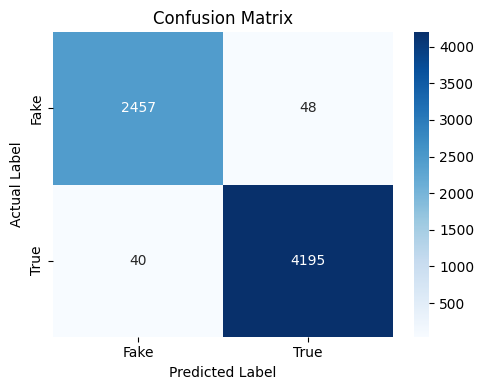

In [94]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report
print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

# Plotting confusion matrix as heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.show()


In [95]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict labels
y_pred = model.predict(X_test)

# If original labels were strings
y_test_labels = y_test if isinstance(y_test.iloc[0], str) else y_test.map({1: 'TRUE', 0: 'FAKE'})
y_pred_labels = pd.Series(y_pred).map({1: 'TRUE', 0: 'FAKE'}) if isinstance(y_pred[0], int) else y_pred

# Classification report
print("=== Classification Report ===")
print(classification_report(y_test_labels, y_pred_labels))

# Confusion matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test_labels, y_pred_labels))


=== Classification Report ===
              precision    recall  f1-score   support

        FAKE       0.98      0.98      0.98      2505
        TRUE       0.99      0.99      0.99      4235

    accuracy                           0.99      6740
   macro avg       0.99      0.99      0.99      6740
weighted avg       0.99      0.99      0.99      6740

=== Confusion Matrix ===
[[2457   48]
 [  40 4195]]


## Feature Importance Visualization

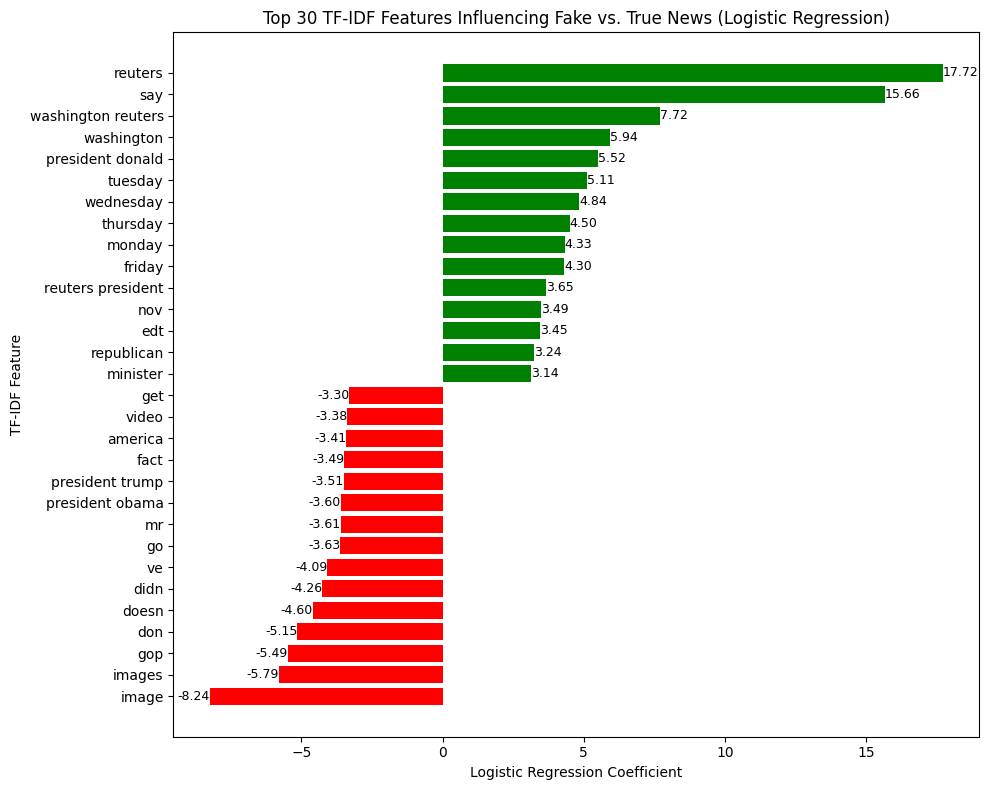

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature names and model coefficients
feature_names = tfidf.get_feature_names_out()
coefs = model.coef_[0]  # 1D array since binary classification

# Get top 15 positive (TRUE) and top 15 negative (FAKE) coefficients
top_n = 15
top_positive_indices = np.argsort(coefs)[-top_n:]   # Most positive weights
top_negative_indices = np.argsort(coefs)[:top_n]    # Most negative weights

# Combine and label
top_indices = np.hstack([top_negative_indices, top_positive_indices])
top_features = [feature_names[i] for i in top_indices]
top_weights = coefs[top_indices]
colors = ['red' if w < 0 else 'green' for w in top_weights]

# Sort for better visualization
sorted_indices = np.argsort(top_weights)
top_features = [top_features[i] for i in sorted_indices]
top_weights = top_weights[sorted_indices]
colors = [colors[i] for i in sorted_indices]

# Plot
plt.figure(figsize=(10, 8))
bars = plt.barh(top_features, top_weights, color=colors)
plt.title("Top 30 TF-IDF Features Influencing Fake vs. True News (Logistic Regression)")
plt.xlabel("Logistic Regression Coefficient")
plt.ylabel("TF-IDF Feature")

# Add labels on bars
for i, v in enumerate(top_weights):
    plt.text(v, i, f"{v:.2f}", va='center', ha='right' if v < 0 else 'left', fontsize=9)

plt.tight_layout()
plt.show()


ROC-AUC Score: 0.9985


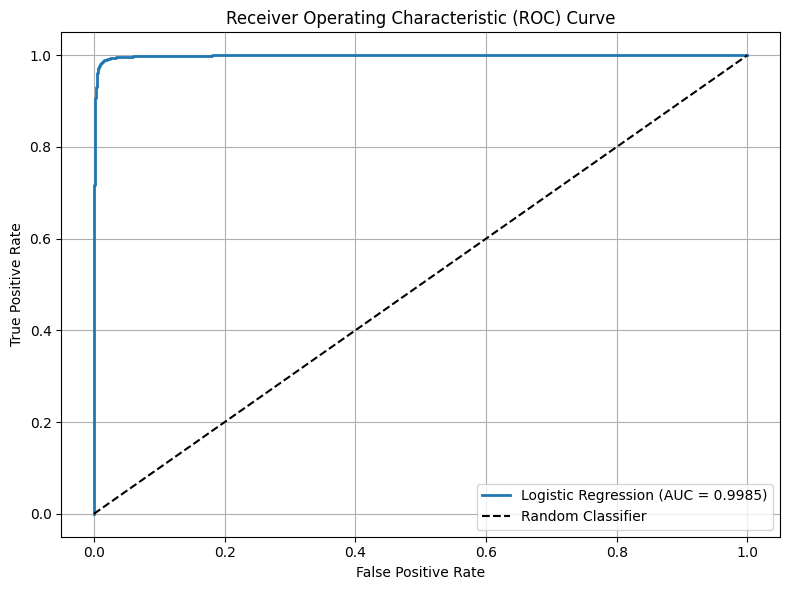

In [97]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Map labels: 'TRUE' → 1, 'FAKE' → 0
y_test_numeric = y_test.map({'TRUE': 1, 'FAKE': 0}).astype(int)

# Get predicted probabilities for class 1 (TRUE news)
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test_numeric, y_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'Logistic Regression (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [98]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Metrics
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

        FAKE       0.98      0.98      0.98      2505
        TRUE       0.99      0.99      0.99      4235

    accuracy                           0.99      6740
   macro avg       0.99      0.99      0.99      6740
weighted avg       0.99      0.99      0.99      6740

Confusion Matrix:
 [[2457   48]
 [  40 4195]]
ROC-AUC Score: 0.9984616363494969


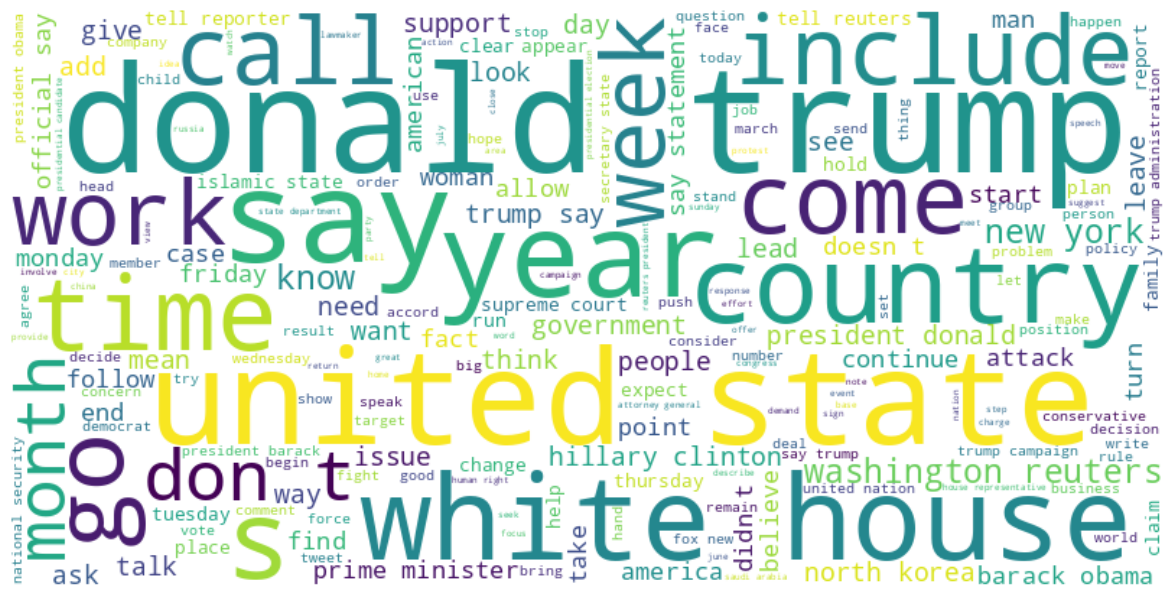

In [99]:
from wordcloud import WordCloud

# Example for all text (can also filter by label)
text = ' '.join(df['clean_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [100]:
from sklearn.model_selection import cross_val_score

# Define range of C values to try
C_values = [0.01, 0.1, 1, 10]

# Store results
results = []

print("C value | Mean F1 score | Std Dev")
print("-" * 32)

for C_val in C_values:
    model = LogisticRegression(C=C_val, solver='liblinear',class_weight='balanced', max_iter=1000, random_state=42)

    # Use original X_train and y_train instead of balanced ones
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')

    mean_f1 = np.mean(cv_scores).round(4)
    std_f1 = np.std(cv_scores).round(4)

    results.append((C_val, mean_f1, std_f1))

    print(f"{C_val:<6} | {mean_f1:<13} | {std_f1}")

# Optional: find best C
best = max(results, key=lambda x: x[1])
print("\nBest C based on mean F1:", best[0])


C value | Mean F1 score | Std Dev
--------------------------------
0.01   | 0.9375        | 0.0038
0.1    | 0.9719        | 0.003
1      | 0.9873        | 0.0014
10     | 0.9915        | 0.0008

Best C based on mean F1: 10


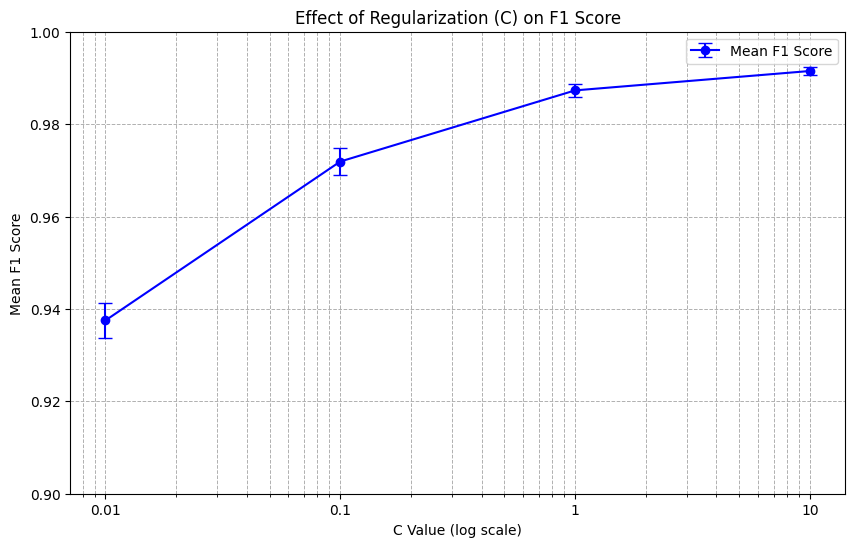

In [101]:
# Unpack automatically (no hardcoding!)
C_vals, mean_f1_scores, std_devs = zip(*results)

# Plot automatically
plt.figure(figsize=(10, 6))
plt.errorbar(C_vals, mean_f1_scores, yerr=std_devs, fmt='-o', capsize=5, color='blue', label='Mean F1 Score')

plt.xscale('log')
plt.title('Effect of Regularization (C) on F1 Score')
plt.xlabel('C Value (log scale)')
plt.ylabel('Mean F1 Score')
plt.xticks(C_vals, C_vals)
plt.ylim(0.9, 1.0)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.legend()
plt.show()


# 🔹 Model 2: Logistic Regression (TF-IDF, Tuned C=10)

In [102]:
# Train the final model with C=10
final_model = LogisticRegression(C=10, solver='liblinear', class_weight='balanced', max_iter=1000, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred = final_model.predict(X_test)

# Classification Report on Test Set
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC Score
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, final_model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score on Test Set: {roc_auc:.4f}")


Classification Report on Test Set:
              precision    recall  f1-score   support

        FAKE       0.99      0.99      0.99      2505
        TRUE       0.99      0.99      0.99      4235

    accuracy                           0.99      6740
   macro avg       0.99      0.99      0.99      6740
weighted avg       0.99      0.99      0.99      6740

Confusion Matrix:
[[2471   34]
 [  33 4202]]
ROC-AUC Score on Test Set: 0.9989


In [103]:
# Training score
train_score = final_model.score(X_train, y_train)
print(f"Training accuracy: {train_score:.4f}")

# Testing score
test_score = final_model.score(X_test, y_test)
print(f"Testing accuracy: {test_score:.4f}")


Training accuracy: 0.9991
Testing accuracy: 0.9901


In [ ]:
import joblib
joblib.dump(final_model, '/content/drive/My Drive/FYP/final_logistic_regression_model.pkl')

['/content/drive/My Drive/FYP/final_logistic_regression_model.pkl']

In [104]:
tfidf.get_feature_names_out()[:20]

array(['abadi', 'abandon', 'abbas', 'abc', 'abc news', 'abdullah', 'abe',
       'abedin', 'abide', 'ability', 'able', 'abortion', 'absence',
       'absolute', 'absurd', 'abu', 'abuse', 'academic', 'accelerate',
       'accept'], dtype=object)

In [105]:
tfidf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 0.95,
 'max_features': 5000,
 'min_df': 2,
 'ngram_range': (1, 2),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

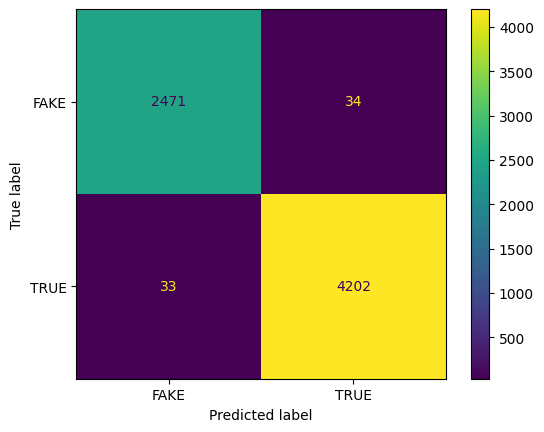

In [106]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
import joblib

# Define folder path
folder_path = '/content/drive/My Drive/FYP/'

# ✅ Save cleaned data
df.to_csv(folder_path + 'cleaned_data.csv', index=False)
print("✅ Cleaned data saved as 'cleaned_data.csv'")

# ✅ TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2), max_df=0.95, min_df=2)
X = tfidf.fit_transform(df['clean_text'])

# ✅ Save TF-IDF matrix + vectorizer
joblib.dump(X, folder_path + 'tfidf_matrix.pkl')
joblib.dump(tfidf, folder_path + 'tfidf_vectorizer.pkl')
print("✅ TF-IDF matrix and vectorizer saved")

# ✅ Save labels (optional but useful)
df['label'].to_csv(folder_path + 'labels.csv', index=False)
print("✅ Labels saved as 'labels.csv'")


✅ Cleaned data saved as 'cleaned_data.csv'
✅ TF-IDF matrix and vectorizer saved
✅ Labels saved as 'labels.csv'


In [ ]:
# Define folder path
folder_path = '/content/drive/My Drive/FYP/'

# ✅ Save the trained model in FYP folder
joblib.dump(final_model, folder_path + 'logistic_regression_model.pkl')
print("✅ Logistic Regression model saved as 'logistic_regression_model.pkl'")


✅ Logistic Regression model saved as 'logistic_regression_model.pkl'


In [ ]:
# import joblib
# # Load cleaned data
# df = pd.read_csv('cleaned_data.csv')

# # Load TF-IDF matrix (X)
# X = joblib.load('tfidf_matrix.pkl')

# # Load TF-IDF vectorizer (useful if you want to transform new data later)
# tfidf = joblib.load('tfidf_vectorizer.pkl')

# # Load labels (y)
# y = pd.read_csv('labels.csv').values.ravel()  # Convert DataFrame → 1D array

# # Load trained Logistic Regression model
# final_model = joblib.load('logistic_regression_model.pkl')

# print("✅ All saved files loaded successfully!")


# DisTilBERT Implementation

In [2]:
import pandas as pd
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [5]:
# Load dataset
df = pd.read_csv(folder_path + 'cleaned_text_with_token_reduction.csv')
df = df.dropna(subset=['clean_text'])  # Drop rows with missing clean_text
df = df.reset_index(drop=True)         # Reset index after dropping rows

# Sample smaller dataset
sampled_df = df.sample(n=5000, random_state=42).reset_index(drop=True)



In [6]:
df

,title,text,subject,date,label,clean_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",TRUE,washington reuters head conservative republica...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",TRUE,washington reuters transgender people allow ti...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",TRUE,washington reuters special counsel investigati...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",TRUE,washington reuters trump campaign adviser geor...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",TRUE,reuters president donald trump call postal ser...
...,...,...,...,...,...,...
33668,The White House and The Theatrics of ‘Gun Cont...,21st Century Wire says All the world s a stage...,US_News,"January 7, 2016",FAKE,st century wire say world s stage man woman pl...
33669,Activists or Terrorists? How Media Controls an...,Randy Johnson 21st Century WireThe majority ...,US_News,"January 7, 2016",FAKE,randy johnson st century wirethe majority main...
33670,"BOILER ROOM – No Surrender, No Retreat, Heads ...",Tune in to the Alternate Current Radio Network...,US_News,"January 6, 2016",FAKE,tune alternate current radio network acr live ...
33671,Federal Showdown Looms in Oregon After BLM Abu...,21st Century Wire says A new front has just op...,US_News,"January 4, 2016",FAKE,st century wire say new open long battle ameri...


In [7]:
sampled_df

,title,text,subject,date,label,clean_text
0,At least 4 dead after powerful Mexico quake: o...,MEXICO CITY (Reuters) - At least four people w...,worldnews,"September 19, 2017",TRUE,mexico city reuters people kill powerful earth...
1,U.S. Attorney General defends Trump on NFL pro...,WASHINGTON (Reuters) - U.S. Attorney General J...,politicsNews,"September 26, 2017",TRUE,washington reuters attorney general jeff sessi...
2,Britain seeks to smooth Brexit path for nuclea...,LONDON (Reuters) - The British government said...,worldnews,"September 14, 2017",TRUE,london reuters british government say thursday...
3,Cameroon separatists kill four gendarmes as An...,YAOUNDE (Reuters) - Militants seeking independ...,worldnews,"December 18, 2017",TRUE,yaounde reuters militants seek independence ca...
4,Factbox: Long history of U.S. leakers to media...,(Reuters) - While one focus of the leak crackd...,politicsNews,"August 4, 2017",TRUE,reuters focus leak crackdown announce friday a...
...,...,...,...,...,...,...
4995,Extortionist seeking millions by poisoning sup...,BERLIN (Reuters) - A man slipped a potentially...,worldnews,"September 28, 2017",TRUE,berlin reuters man slip lethal poison food inc...
4996,Ex-Illinois Governor Blagojevich loses bid to ...,(Reuters) - Former Illinois governor Rod Blago...,politicsNews,"April 21, 2017",TRUE,reuters illinois governor rod blagojevich lose...
4997,U.S. voices concern about efforts to undermine...,WASHINGTON (Reuters) - The United States on We...,worldnews,"October 25, 2017",TRUE,washington reuters united states wednesday con...
4998,More than 90 arrested in protests in Washingto...,WASHINGTON (Reuters) - More than 90 people hav...,politicsNews,"January 20, 2017",TRUE,washington reuters people arrest protest natio...


In [8]:
df.shape

(33673, 6)

In [9]:
sampled_df.shape

(5000, 6)

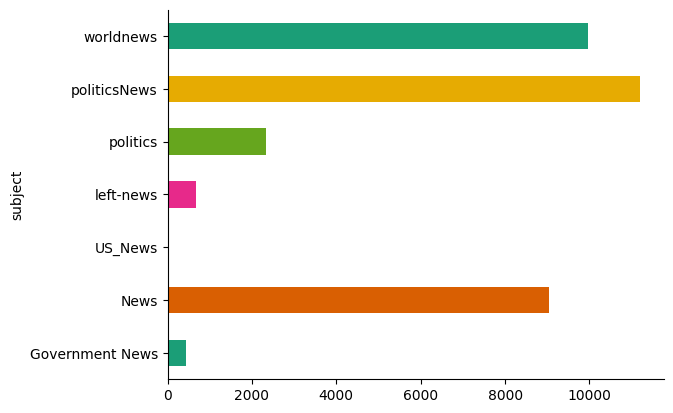

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('subject').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Visualize the Label

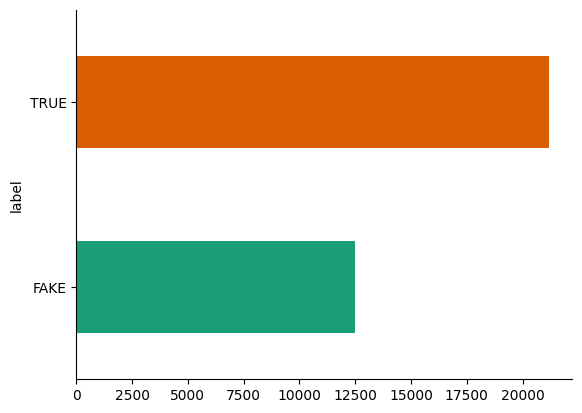

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, stratify=df['label'], random_state=42)


In [13]:
from transformers import logging
logging.set_verbosity_error()  # suppress warnings


In [14]:
# Load DistilBERT tokenizer + model
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
bert_model = AutoModel.from_pretrained('distilbert-base-uncased')


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

## 🔍 What is Embedding Extraction?

**Embedding extraction** converts text into **numerical vectors** (embeddings) that capture the meaning and context of the text. These vectors help machine learning models process and understand language.

### 🧠 Why It Matters

ML models need numbers, not text. Embeddings provide a semantic-rich numeric form of text, enabling better predictions (e.g., distinguishing Fake vs. True news).

### 📌 Example

> **"Government announces new tax reforms."**  
→ `[0.12, -0.45, 0.87, ..., 0.04]` (e.g., 768-dim vector from BERT)

Similar texts → similar vectors.

### 🛠️ In This Project

We use a **pre-trained BERT** model and extract the `[CLS]` token embedding:

```python
embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()


In [15]:
import torch
from tqdm import tqdm
import numpy as np
import time

torch.set_float32_matmul_precision('high')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)
bert_model.eval()

start_time = time.time()

def get_embeddings(texts, batch_size=128, max_length=128):
    all_embeddings = []
    total_batches = (len(texts) + batch_size - 1) // batch_size

    for i in tqdm(range(0, len(texts), batch_size), desc='Extracting Embeddings', total=total_batches):
        batch_texts = texts[i:i + batch_size]

        inputs = tokenizer(
            batch_texts.tolist(),
            padding=True,
            truncation=True,
            max_length=max_length,
            return_tensors='pt'
        ).to(device)

        with torch.no_grad():
            outputs = bert_model(**inputs)

        embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        all_embeddings.append(embeddings)

        # Clean up GPU memory
        del inputs, outputs
        torch.cuda.empty_cache()

    return np.vstack(all_embeddings)

X_train_embeddings = get_embeddings(X_train, batch_size=128, max_length=128)
X_test_embeddings = get_embeddings(X_test, batch_size=128, max_length=128)

end_time = time.time()
minutes = int((end_time - start_time) // 60)
seconds = int((end_time - start_time) % 60)
print(f"✅ Total execution time: {minutes} minutes and {seconds} seconds")


Extracting Embeddings: 100%|██████████| 53/53 [00:26<00:00,  1.98it/s]

✅ Total execution time: 2 minutes and 22 seconds


In [16]:
# # Optional: Save for reuse later
# np.save('X_train_embeddings.npy', X_train_embeddings)
# np.save('X_test_embeddings.npy', X_test_embeddings)


# 🔹 Model 3: BERT Embeddings + Logistic Regression

In [17]:
# Train Logistic Regression
clf = LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1)

clf.fit(X_train_embeddings, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1)

In [19]:
# Evaluate
y_pred = clf.predict(X_test_embeddings)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
print("Confusion Matrix:\n", cm)

Classification Report:
               precision    recall  f1-score   support

        FAKE       0.99      0.99      0.99      2500
        TRUE       0.99      0.99      0.99      4235

    accuracy                           0.99      6735
   macro avg       0.99      0.99      0.99      6735
weighted avg       0.99      0.99      0.99      6735

Confusion Matrix:
 [[2466   34]
 [  30 4205]]


## Visualize the Embeddings

In [20]:
from transformers import AutoModel

model = AutoModel.from_pretrained('distilbert-base-uncased')
print(model)


DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

In [21]:
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")


Total parameters: 66,362,880
Trainable parameters: 66,362,880


In [22]:
print(f"X_train_embeddings shape: {X_train_embeddings.shape}")
print(f"X_test_embeddings shape: {X_test_embeddings.shape}")


X_train_embeddings shape: (26938, 768)
X_test_embeddings shape: (6735, 768)


In [23]:
print(f"Train Accuracy: {clf.score(X_train_embeddings, y_train):.4f}")
print(f"Test Accuracy:  {clf.score(X_test_embeddings, y_test):.4f}")


Train Accuracy: 0.9926
Test Accuracy:  0.9905


In [24]:
import joblib

folder_path = '/content/drive/My Drive/FYP/'

# Save model
clf_filename = folder_path + "fake_news_logreg_model.joblib"
joblib.dump(clf, clf_filename)

# Save tokenizer
tokenizer.save_pretrained(folder_path + 'fake_news_tokenizer')


('/content/drive/My Drive/FYP/fake_news_tokenizer/tokenizer_config.json',
 '/content/drive/My Drive/FYP/fake_news_tokenizer/special_tokens_map.json',
 '/content/drive/My Drive/FYP/fake_news_tokenizer/vocab.txt',
 '/content/drive/My Drive/FYP/fake_news_tokenizer/added_tokens.json',
 '/content/drive/My Drive/FYP/fake_news_tokenizer/tokenizer.json')

In [25]:
import joblib

folder_path = '/content/drive/My Drive/FYP/'

# Save trained Logistic Regression classifier
joblib.dump(clf, folder_path + "trained_logistic_regression.pkl")

# Save tokenizer for reproducibility
tokenizer.save_pretrained(folder_path + "saved_tokenizer")


('/content/drive/My Drive/FYP/saved_tokenizer/tokenizer_config.json',
 '/content/drive/My Drive/FYP/saved_tokenizer/special_tokens_map.json',
 '/content/drive/My Drive/FYP/saved_tokenizer/vocab.txt',
 '/content/drive/My Drive/FYP/saved_tokenizer/added_tokens.json',
 '/content/drive/My Drive/FYP/saved_tokenizer/tokenizer.json')

# Fine-Tune DistilBERT (Full End-to-End)

In [26]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
# ─── Imports ──────────────────────────────────────────────────────────────
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

from transformers import DistilBertTokenizerFast, TFDistilBertForSequenceClassification, create_optimizer


In [108]:
# ─── Environment & Reproducibility ─────────────────────────────────────────
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)
tf.keras.mixed_precision.set_global_policy("mixed_float16")

In [109]:
# ─── Load Dataset ──────────────────────────────────────────────────────────
df = pd.read_csv('/content/drive/My Drive/FYP/cleaned_text_with_token_reduction.csv')
df.dropna(subset=['clean_text'], inplace=True)
df.drop_duplicates(['clean_text'], inplace=True)
df.reset_index(drop=True, inplace=True)

# Encode labels
df['label_id'] = df['label'].map({"TRUE": 1, "FAKE": 0})
print("✅ Label counts:\n", df['label_id'].value_counts())
print(df[['clean_text', 'label', 'label_id']].sample(5))


✅ Label counts:
 label_id
1    21044
0    12500
Name: count, dtype: int64
                                              clean_text label  label_id
5667   reuters highlights day president donald trump ...  TRUE         1
16327  kievmoscow reuters cyber attack malware call b...  TRUE         1
14148  rome reuters italy antiestablishment star move...  TRUE         1
196    washington reuters republican chairman senate ...  TRUE         1
6424   reuters presidentelect donald trump transition...  TRUE         1


In [110]:
df

,title,text,subject,date,label,clean_text,label_id
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",TRUE,washington reuters head conservative republica...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",TRUE,washington reuters transgender people allow ti...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",TRUE,washington reuters special counsel investigati...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",TRUE,washington reuters trump campaign adviser geor...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",TRUE,reuters president donald trump call postal ser...,1
...,...,...,...,...,...,...,...
33539,The White House and The Theatrics of ‘Gun Cont...,21st Century Wire says All the world s a stage...,US_News,"January 7, 2016",FAKE,st century wire say world s stage man woman pl...,0
33540,Activists or Terrorists? How Media Controls an...,Randy Johnson 21st Century WireThe majority ...,US_News,"January 7, 2016",FAKE,randy johnson st century wirethe majority main...,0
33541,"BOILER ROOM – No Surrender, No Retreat, Heads ...",Tune in to the Alternate Current Radio Network...,US_News,"January 6, 2016",FAKE,tune alternate current radio network acr live ...,0
33542,Federal Showdown Looms in Oregon After BLM Abu...,21st Century Wire says A new front has just op...,US_News,"January 4, 2016",FAKE,st century wire say new open long battle ameri...,0


In [111]:
df['clean_text']

,clean_text
0,washington reuters head conservative republica...
1,washington reuters transgender people allow ti...
2,washington reuters special counsel investigati...
3,washington reuters trump campaign adviser geor...
4,reuters president donald trump call postal ser...
...,...
33539,st century wire say world s stage man woman pl...
33540,randy johnson st century wirethe majority main...
33541,tune alternate current radio network acr live ...
33542,st century wire say new open long battle ameri...


In [112]:
df["label_id"].value_counts()

,count
label_id,
1,21044
0,12500


In [113]:
df["label_id"]

,label_id
0,1
1,1
2,1
3,1
4,1
...,...
33539,0
33540,0
33541,0
33542,0


In [114]:
# ─── Train/Val Split ───────────────────────────────────────────────────────
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['clean_text'].tolist(),
    df['label_id'].tolist(),
    test_size=0.2,
    stratify=df['label_id'],
    random_state=SEED
)

In [115]:
# ─── Compute Class Weights ─────────────────────────────────────────────────
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weight_dict = {cls: weight for cls, weight in zip(np.unique(train_labels), class_weights)}
print("✅ Class Weights:", class_weight_dict)

✅ Class Weights: {np.int64(0): np.float64(1.34175), np.int64(1): np.float64(0.797000297000297)}


In [116]:
# ─── Tokenization ──────────────────────────────────────────────────────────
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
MAX_LEN = 256

def tokenize(texts):
    return tokenizer(
        texts,
        truncation=True,
        padding="max_length",
        max_length=MAX_LEN,
        return_tensors="tf"
    )

train_encodings = tokenize(train_texts)
val_encodings = tokenize(val_texts)

In [117]:
# ─── TensorFlow Datasets ───────────────────────────────────────────────────
batch_size = 32

train_ds = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels)) \
    .shuffle(1000) \
    .batch(batch_size) \
    .cache() \
    .prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((dict(val_encodings), val_labels)) \
    .batch(batch_size) \
    .cache() \
    .prefetch(tf.data.AUTOTUNE)

In [118]:
# ─── Load Model ────────────────────────────────────────────────────────────
model = TFDistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=2
)

In [119]:
# ─── Optimizer & Compile ───────────────────────────────────────────────────
epochs = 4
steps_per_epoch = len(train_ds)
num_train_steps = steps_per_epoch * epochs

optimizer, lr_schedule = create_optimizer(
    init_lr=1e-5,
    num_warmup_steps=0.1 * num_train_steps,
    num_train_steps=num_train_steps,
    weight_decay_rate=0.01
)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [120]:
# ─── Callbacks ─────────────────────────────────────────────────────────────
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(
        filepath="/content/drive/My Drive/FYP/best_model_checkpoint",
        save_weights_only=True,
        monitor="val_accuracy",
        save_best_only=True
    )
]

In [121]:
# ─── Train with Balanced Class Weights ─────────────────────────────────────
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=callbacks,
    class_weight=class_weight_dict
)

Epoch 1/4
839/839 [==============================] - 365s 414ms/step - loss: 0.1189 - accuracy: 0.9569 - val_loss: 0.0080 - val_accuracy: 0.9987
Epoch 2/4
839/839 [==============================] - 364s 434ms/step - loss: 0.0085 - accuracy: 0.9983 - val_loss: 0.0050 - val_accuracy: 0.9993
Epoch 3/4
839/839 [==============================] - 374s 445ms/step - loss: 0.0042 - accuracy: 0.9990 - val_loss: 0.0042 - val_accuracy: 0.9994
Epoch 4/4
839/839 [==============================] - 337s 402ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.0043 - val_accuracy: 0.9994


In [123]:
# ─── Evaluate ─────────────────────────────────────────
val_preds = model.predict(val_ds).logits
val_preds_class = np.argmax(val_preds, axis=1)

print("\n Classification Report:\n")
print(classification_report(val_labels, val_preds_class, target_names=["FAKE", "TRUE"]))

val_accuracy = np.mean(val_preds_class == val_labels)
print(f"Overall Validation Accuracy: {val_accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(val_labels, val_preds_class)
print("Confusion Matrix:")
print(cm)

210/210 [==============================] - 26s 125ms/step

 Classification Report:

              precision    recall  f1-score   support

        FAKE       1.00      1.00      1.00      2500
        TRUE       1.00      1.00      1.00      4209

    accuracy                           1.00      6709
   macro avg       1.00      1.00      1.00      6709
weighted avg       1.00      1.00      1.00      6709

Overall Validation Accuracy: 0.9994
Confusion Matrix:
[[2499    1]
 [   3 4206]]


In [ ]:
# ─── Save Model & Tokenizer ──────────────────────────
# Save your fully trained Keras model (includes all layers)
model.save("/content/drive/My Drive/FYP/final_distilbert_model_keras")

# Also save tokenizer as usual (so your preprocessing is consistent)
tokenizer.save_pretrained("/content/drive/My Drive/FYP/final_distilbert_model")

print("✅ Final DistilBERT model & tokenizer saved.")

✅ Final DistilBERT model & tokenizer saved.


In [ ]:
model.summary()


Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMa  multiple                  66362880  
 inLayer)                                                        
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_19 (Dropout)        multiple                  0         
                                                                 
Total params: 66955010 (255.41 MB)
Trainable params: 66955010 (255.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


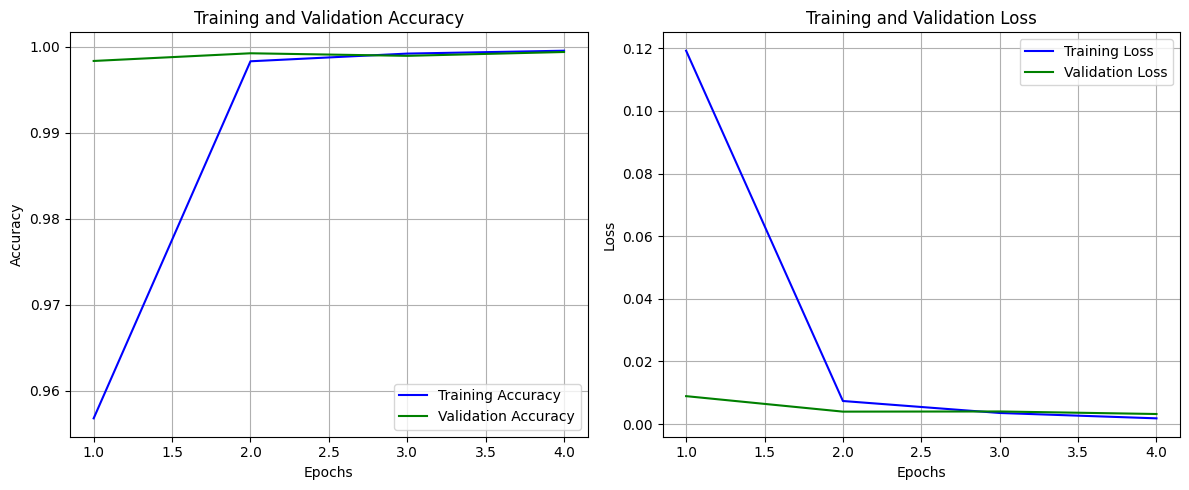

In [ ]:
import matplotlib.pyplot as plt

# Extract data
acc     = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss    = history.history['loss']
val_loss = history.history['val_loss']
epochs  = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'g-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


210/210 [==============================] - 27s 130ms/step


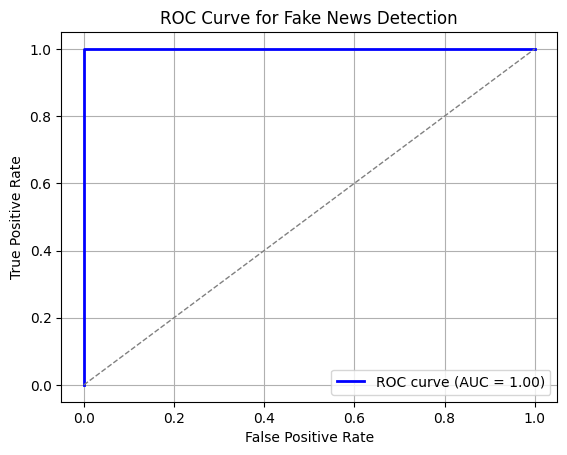

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Get probabilities
val_logits = model.predict(val_ds).logits
probs = tf.nn.softmax(val_logits, axis=1).numpy()[:, 1]

# True labels already binary (0,1)
fpr, tpr, _ = roc_curve(val_labels, probs)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fake News Detection')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# Fine-Tuned DistilBERT Testing

In [ ]:
from transformers import DistilBertTokenizerFast
import tensorflow as tf
import numpy as np

# ─── Load trained tokenizer & model ───────────────────────────────────────
tokenizer = DistilBertTokenizerFast.from_pretrained("/content/drive/My Drive/FYP/final_distilbert_model")
model = tf.keras.models.load_model("/content/drive/My Drive/FYP/final_distilbert_model_keras")

# ─── Your political/government news samples ──────────────────────────────
test_samples = [
    """The government unveiled a comprehensive new education initiative today, allocating over
    50 billion rupees towards improving infrastructure in rural schools. Officials stated that
    this plan aims to reduce dropout rates and increase literacy levels over the next decade.""",

    """According to widely shared social media posts, the President recently confessed during
    a live television broadcast that the last election was manipulated by foreign operatives.
    However, independent fact-checkers and multiple international observers have found no
    evidence to support these claims.""",

    """Left-wing political coalitions are pushing aggressively for new climate legislation,
    seeking to impose stricter carbon emission limits across all industries. Critics argue
    this will harm the manufacturing sector, while supporters believe it is crucial to
    mitigate the effects of climate change.""",

    """A series of articles circulating online allege that the government passed a secret
    bill authorizing mass electronic surveillance of citizens without any judicial oversight.
    Legal experts have called these reports baseless, pointing out that no such legislation
    exists on parliamentary records."""
]

# ─── Tokenize inputs ──────────────────────────────────────────────────────
inputs = tokenizer(
    test_samples,
    truncation=True,
    padding="max_length",
    max_length=256,
    return_tensors="tf"
)

# ─── Get logits from model output dict ────────────────────────────────────
outputs = model(inputs)
logits = outputs["logits"]

# ─── Compute softmax probs and predicted class ────────────────────────────
probs = tf.nn.softmax(logits, axis=1).numpy()
pred_classes = np.argmax(probs, axis=1)

# ─── Map to label names ──────────────────────────────────────────────────
label_map = {0: "FAKE", 1: "TRUE"}

# ─── Print results ───────────────────────────────────────────────────────
for text, pred, prob in zip(test_samples, pred_classes, probs):
    label = label_map[pred]
    confidence = prob[pred]
    print(f"\n📰 News: \"{text[:80]}...\"")
    print(f"✅ Prediction: {label} (confidence: {confidence:.4f})")



📰 News: "The government unveiled a comprehensive new education initiative today, allocati..."
✅ Prediction: FAKE (confidence: 0.6675)

📰 News: "According to widely shared social media posts, the President recently confessed ..."
✅ Prediction: TRUE (confidence: 0.5542)

📰 News: "Left-wing political coalitions are pushing aggressively for new climate legislat..."
✅ Prediction: FAKE (confidence: 0.8784)

📰 News: "A series of articles circulating online allege that the government passed a secr..."
✅ Prediction: FAKE (confidence: 0.8770)


In [ ]:
# ─── Set threshold ─────────────────────────────────────────────────────────
threshold = 0.80

# ─── Print results with threshold-based decision ───────────────────────────
for text, prob in zip(test_samples, probs):
    if prob[0] > threshold:
        final_label = "FAKE"
    else:
        final_label = "TRUE"
    print(f"\n📰 News: \"{text[:80]}...\"")
    print(f"✅ Prediction: {final_label} (FAKE prob: {prob[0]:.4f} | TRUE prob: {prob[1]:.4f})")



📰 News: "The government unveiled a comprehensive new education initiative today, allocati..."
✅ Prediction: TRUE (FAKE prob: 0.6675 | TRUE prob: 0.3325)

📰 News: "According to widely shared social media posts, the President recently confessed ..."
✅ Prediction: TRUE (FAKE prob: 0.4458 | TRUE prob: 0.5542)

📰 News: "Left-wing political coalitions are pushing aggressively for new climate legislat..."
✅ Prediction: FAKE (FAKE prob: 0.8784 | TRUE prob: 0.1218)

📰 News: "A series of articles circulating online allege that the government passed a secr..."
✅ Prediction: FAKE (FAKE prob: 0.8770 | TRUE prob: 0.1231)


In [ ]:
# ─── Replace your test_samples with long texts ─────────────────────────────
test_samples = [
    """The government unveiled a comprehensive new education initiative today, allocating over
    50 billion rupees towards improving infrastructure in rural schools. Officials stated that
    this plan aims to reduce dropout rates and increase literacy levels over the next decade.""",

    """According to widely shared social media posts, the President recently confessed during
    a live television broadcast that the last election was manipulated by foreign operatives.
    However, independent fact-checkers and multiple international observers have found no
    evidence to support these claims.""",

    """Left-wing political coalitions are pushing aggressively for new climate legislation,
    seeking to impose stricter carbon emission limits across all industries. Critics argue
    this will harm the manufacturing sector, while supporters believe it is crucial to
    mitigate the effects of climate change.""",

    """A series of articles circulating online allege that the government passed a secret
    bill authorizing mass electronic surveillance of citizens without any judicial oversight.
    Legal experts have called these reports baseless, pointing out that no such legislation
    exists on parliamentary records."""
]

# ─── Tokenize, predict, apply threshold ────────────────────────────────────
inputs = tokenizer(
    test_samples,
    truncation=True,
    padding="max_length",
    max_length=256,
    return_tensors="tf"
)

outputs = model(inputs)
logits = outputs["logits"]
probs = tf.nn.softmax(logits, axis=1).numpy()

for text, prob in zip(test_samples, probs):
    if prob[0] > 0.9:
        final_label = "FAKE"
    elif prob[1] > 0.9:
        final_label = "TRUE"
    else:
        final_label = "UNCERTAIN: needs human review"
    print(f"\n📰 News: \"{text[:80]}...\"")
    print(f"✅ Prediction: {final_label} (FAKE prob: {prob[0]:.4f} | TRUE prob: {prob[1]:.4f})")



📰 News: "The government unveiled a comprehensive new education initiative today, allocati..."
✅ Prediction: UNCERTAIN: needs human review (FAKE prob: 0.6675 | TRUE prob: 0.3325)

📰 News: "According to widely shared social media posts, the President recently confessed ..."
✅ Prediction: UNCERTAIN: needs human review (FAKE prob: 0.4458 | TRUE prob: 0.5542)

📰 News: "Left-wing political coalitions are pushing aggressively for new climate legislat..."
✅ Prediction: UNCERTAIN: needs human review (FAKE prob: 0.8784 | TRUE prob: 0.1218)

📰 News: "A series of articles circulating online allege that the government passed a secr..."
✅ Prediction: UNCERTAIN: needs human review (FAKE prob: 0.8770 | TRUE prob: 0.1231)


# Final Comparative Analysis

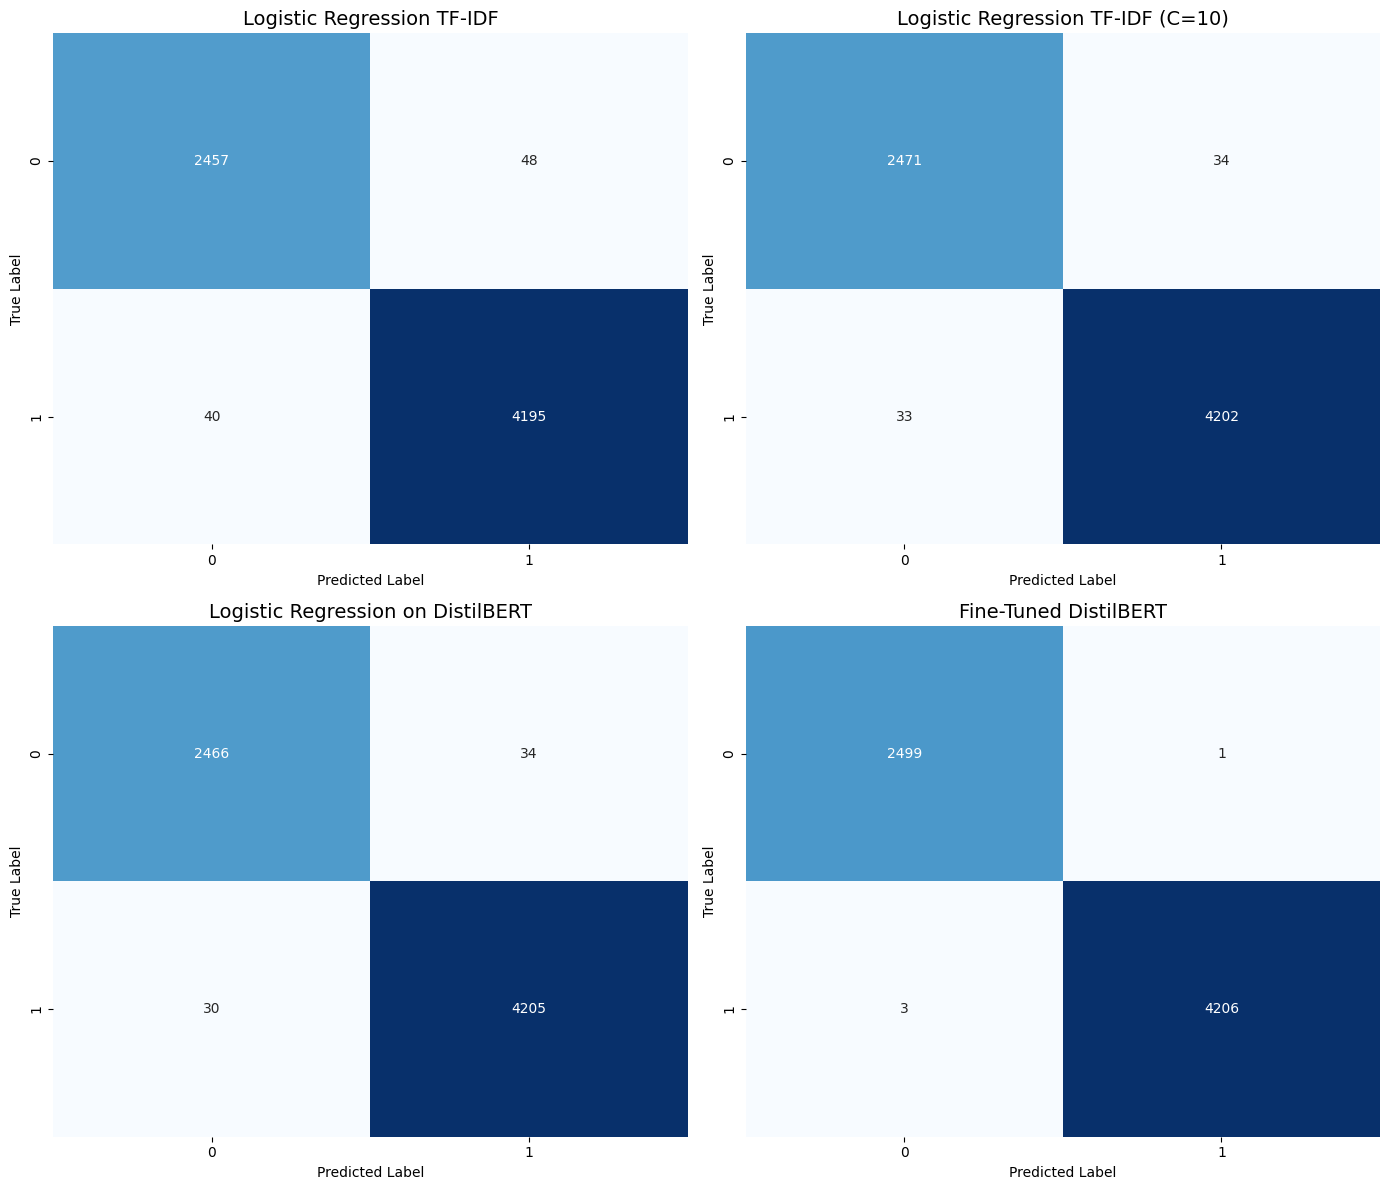


🔍 Final Comparative Analysis (Precision, Recall, F1-Score, Accuracy):

                        Precision  Recall  F1-Score  Accuracy
Model                                                        
LogReg TF-IDF                0.99    0.99      0.99      0.99
LogReg TF-IDF (C=10)         0.99    0.99      0.99      0.99
LogReg BERT embeddings       0.99    0.99      0.99      0.99
Fine-Tuned DistilBERT        1.00    1.00      1.00      1.00


In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ───────────────────────────────
# 1️⃣ Confusion Matrices
# ───────────────────────────────
cm1 = np.array([[2457, 48],
                [  40, 4195]])  # Logistic Regression TF-IDF

cm2 = np.array([[2471, 34],
                [  33, 4202]])  # Logistic Regression TF-IDF Tuned C=10

cm3 = np.array([[2466, 34],
                [  30, 4205]])  # Logistic Regression on DistilBERT embeddings

cm4 = np.array([[2499, 1],
                [   3, 4206]])  # Fine-Tuned DistilBERT

# ───────────────────────────────
# 2️⃣ Classification Metrics
# ───────────────────────────────
# You derived these from the printed reports

metrics_data = {
    "Model": [
        "LogReg TF-IDF",
        "LogReg TF-IDF (C=10)",
        "LogReg BERT embeddings",
        "Fine-Tuned DistilBERT"
    ],
    "Precision": [0.99, 0.99, 0.99, 1.00],
    "Recall":    [0.99, 0.99, 0.99, 1.00],
    "F1-Score":  [0.99, 0.99, 0.99, 1.00],
    "Accuracy":  [0.99, 0.99, 0.99, 1.00]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df.set_index("Model", inplace=True)

# ───────────────────────────────
# 3️⃣ Plot Confusion Matrices
# ───────────────────────────────
plt.figure(figsize=(14, 12))
titles = [
    "Logistic Regression TF-IDF",
    "Logistic Regression TF-IDF (C=10)",
    "Logistic Regression on DistilBERT",
    "Fine-Tuned DistilBERT"
]

conf_matrices = [cm1, cm2, cm3, cm4]

for i, (cm, title) in enumerate(zip(conf_matrices, titles), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title, fontsize=14)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.tight_layout()
plt.show()

# ───────────────────────────────
# 4️⃣ Show Comparative Table
# ───────────────────────────────
print("\n🔍 Final Comparative Analysis (Precision, Recall, F1-Score, Accuracy):\n")
print(metrics_df.round(3))


# Performane Comparison

In [125]:
import pandas as pd

data = {
    "Model": [
        "LogReg (TF-IDF)",
        "LogReg (TF-IDF, C=10)",
        "LogReg (DistilBERT Embeddings)",
        "Fine-Tuned DistilBERT"
    ],
    "Accuracy": [0.99, 0.99, 0.99, 1.00],
    "F1-Score": [0.99, 0.99, 0.99, 1.00],
    "ROC-AUC": [0.9989, 0.9991, None, None]
}

df = pd.DataFrame(data)
print(df)


                            Model  Accuracy  F1-Score  ROC-AUC
0                 LogReg (TF-IDF)      0.99      0.99   0.9989
1           LogReg (TF-IDF, C=10)      0.99      0.99   0.9991
2  LogReg (DistilBERT Embeddings)      0.99      0.99      NaN
3           Fine-Tuned DistilBERT      1.00      1.00      NaN


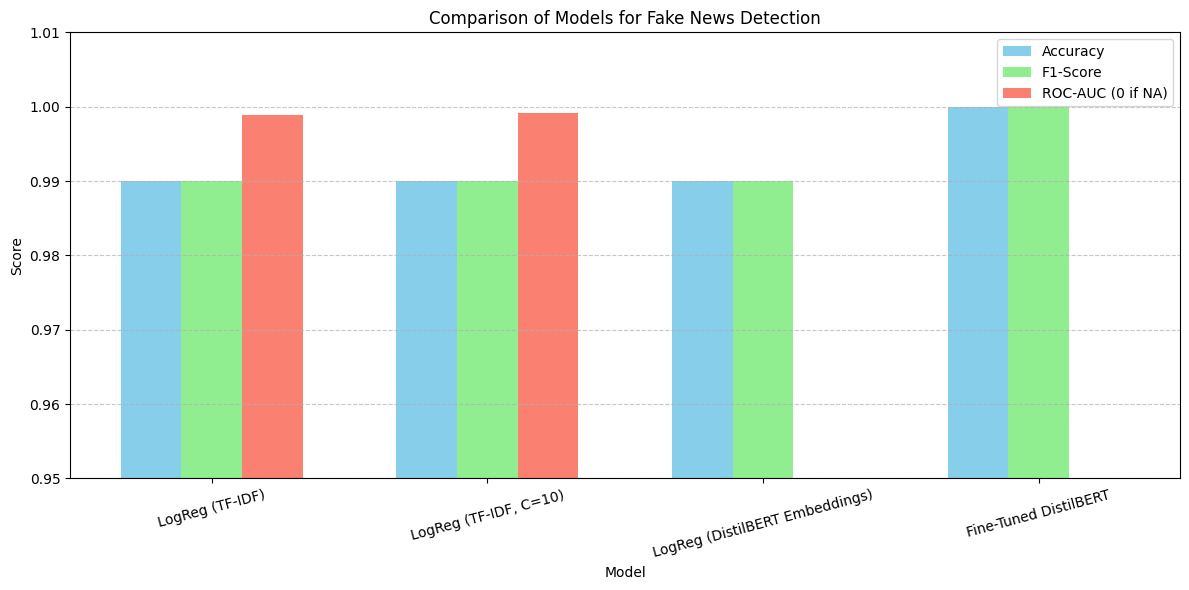

In [126]:
import matplotlib.pyplot as plt
import numpy as np

# Remove None values for ROC-AUC
df_plot = df.copy()
df_plot["ROC-AUC"] = df_plot["ROC-AUC"].fillna(0)

bar_width = 0.22
r1 = np.arange(len(df_plot))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(12,6))
plt.bar(r1, df_plot["Accuracy"], color='skyblue', width=bar_width, label='Accuracy')
plt.bar(r2, df_plot["F1-Score"], color='lightgreen', width=bar_width, label='F1-Score')
plt.bar(r3, df_plot["ROC-AUC"], color='salmon', width=bar_width, label='ROC-AUC (0 if NA)')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Models for Fake News Detection')
plt.xticks([r + bar_width for r in range(len(df_plot))], df_plot["Model"], rotation=15)
plt.ylim(0.95, 1.01)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [127]:
from tabulate import tabulate

table_data = [
    ["LogReg (TF-IDF)", "99.0%", "~0.99", "0.9989"],
    ["LogReg (TF-IDF, C=10)", "99.0%", "~0.99", "0.9991"],
    ["LogReg (DistilBERT Embeddings)", "99.0%", "~0.99", "-"],
    ["Fine-Tuned DistilBERT", "100.0%", "~1.00", "-"]
]

headers = ["Model", "Accuracy", "F1-Score", "ROC-AUC"]

print(tabulate(table_data, headers=headers, tablefmt="fancy_grid"))


╒════════════════════════════════╤════════════╤════════════╤═══════════╕
│ Model                          │ Accuracy   │ F1-Score   │ ROC-AUC   │
╞════════════════════════════════╪════════════╪════════════╪═══════════╡
│ LogReg (TF-IDF)                │ 99.0%      │ ~0.99      │ 0.9989    │
├────────────────────────────────┼────────────┼────────────┼───────────┤
│ LogReg (TF-IDF, C=10)          │ 99.0%      │ ~0.99      │ 0.9991    │
├────────────────────────────────┼────────────┼────────────┼───────────┤
│ LogReg (DistilBERT Embeddings) │ 99.0%      │ ~0.99      │ -         │
├────────────────────────────────┼────────────┼────────────┼───────────┤
│ Fine-Tuned DistilBERT          │ 100.0%     │ ~1.00      │ -         │
╘════════════════════════════════╧════════════╧════════════╧═══════════╛


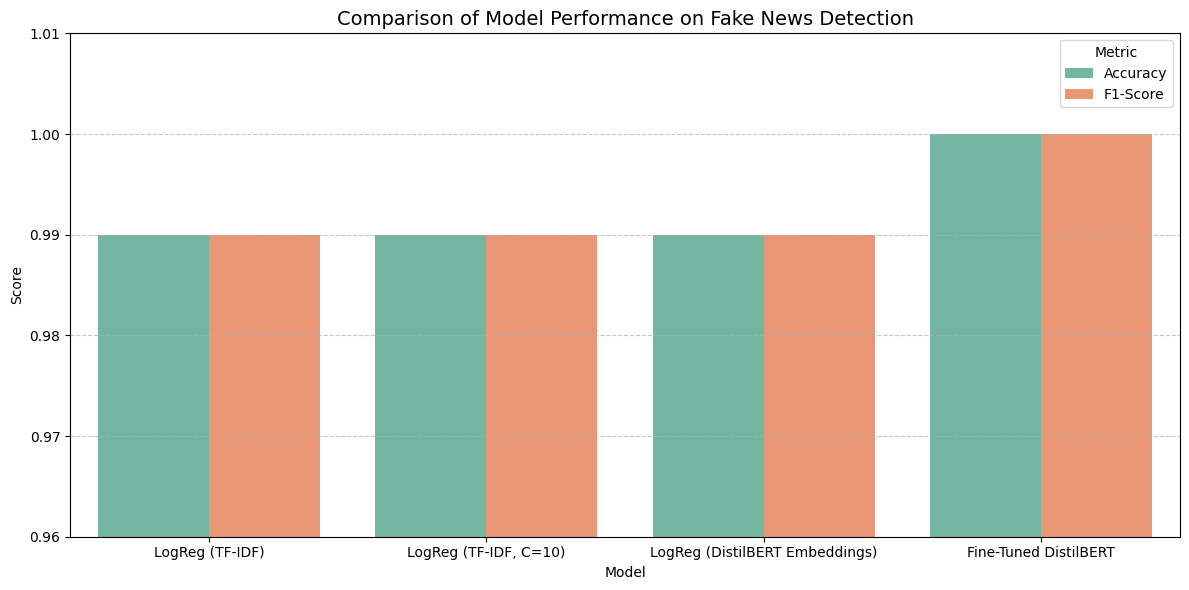

In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    "Model": [
        "LogReg (TF-IDF)",
        "LogReg (TF-IDF, C=10)",
        "LogReg (DistilBERT Embeddings)",
        "Fine-Tuned DistilBERT"
    ],
    "Accuracy": [0.99, 0.99, 0.99, 1.00],
    "F1-Score": [0.99, 0.99, 0.99, 1.00]
}

df = pd.DataFrame(data)
df_melted = df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(12,6))
sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric", palette="Set2")
plt.ylim(0.96, 1.01)
plt.title("Comparison of Model Performance on Fake News Detection", fontsize=14)
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(title="Metric")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
